Thank you Mr.Vikramank for split data code in Python. You can see original code in https://github.com/Vikramank/Deep-Learning-/blob/master/Cats-and-Dogs/Classification-%20Cats%20and%20Dogs.ipynb

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import tflearn
import tensorflow as tf
from PIL import Image
%matplotlib inline
#for writing text files
import glob
import os     
import random 
#reading images from a text file
from tflearn.data_utils import image_preloader
import math

In [2]:
IMAGE_FOLDER = '/home/tiger/Desktop/train'
TRAIN_DATA = '/home/tiger/Desktop/train_data.txt'
TEST_DATA = '/home/tiger/Desktop/test_data.txt'
train_proportion=0.8
test_proportion=0.2

In [3]:
random.seed(123)
#read the image directories
filenames_image = os.listdir(IMAGE_FOLDER)
#shuffling the data is important otherwise the model will be fed with a single class data for a long time and 
#network will not learn properly
random.shuffle(filenames_image)

In [4]:
#total number of images
total=len(filenames_image)
##  *****training data******** 
fr = open(TRAIN_DATA, 'w')
train_files=filenames_image[0: int(train_proportion*total)]
for filename in train_files:
    if filename[0:2] == 'c0':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:2] == 'c1':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')
    elif filename[0:2] == 'c2':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 2\n')
    elif filename[0:2] == 'c3':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 3\n')
    elif filename[0:2] == 'c4':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 4\n')
    elif filename[0:2] == 'c5':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 5\n')
    elif filename[0:2] == 'c6':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 6\n')
    elif filename[0:2] == 'c7':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 7\n')
    elif filename[0:2] == 'c8':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 8\n')
    elif filename[0:2] == 'c9':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 9\n')

fr.close()
##  *****testing data******** 
fr = open(TEST_DATA, 'w')
test_files=filenames_image[int(math.ceil(train_proportion*total)):int(math.ceil((train_proportion+test_proportion)*total))]
for filename in test_files:
    if filename[0:2] == 'c0':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:2] == 'c1':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')
    elif filename[0:2] == 'c2':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 2\n')
    elif filename[0:2] == 'c3':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 3\n')
    elif filename[0:2] == 'c4':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 4\n')
    elif filename[0:2] == 'c5':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 5\n')
    elif filename[0:2] == 'c6':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 6\n')
    elif filename[0:2] == 'c7':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 7\n')
    elif filename[0:2] == 'c8':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 8\n')
    elif filename[0:2] == 'c9':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 9\n')
fr.close()

In [5]:
X_train, Y_train = image_preloader(TRAIN_DATA, image_shape=(30,40),mode='file', categorical_labels=True,normalize=True)
X_test, Y_test = image_preloader(TEST_DATA, image_shape=(30,40),mode='file', categorical_labels=True,normalize=True)

In [6]:
print("Dataset")
print("Number of training images {}".format(len(X_train)))
print("Number of testing images {}".format(len(X_test)))
print("Shape of an image {}" .format(X_train[1].shape))
print("Shape of label:{} ,number of classes: {}".format(Y_train[1].shape,len(Y_train[1])))

Dataset
Number of training images 17938
Number of testing images 4485
Shape of an image (40, 30, 3)
Shape of label:(10,) ,number of classes: 10


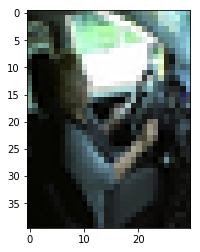

In [7]:
plt.imshow(X_train[0])
plt.show()

แปลงข้อมูลจากรูปแบบ PIL เป็น Numpy Array เพื่อให้สามารถทำงานกับตัวแบบที่เขียนด้วย Keras<br> 
Convert image from PIL to Numpy Array to work with Keras 

In [8]:
train_x = np.array(X_train)
test_x = np.array(X_test)

In [9]:
train_y = np.array(Y_train)
test_y = np.array(Y_test)

Setting NVIDIA GPU

In [10]:
import theano.sandbox.cuda
theano.sandbox.cuda.use("gpu0")

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

/home/tiger/anaconda3/lib/python3.6/site-packages/theano/sandbox/cuda/__init__.py:556: UserWarning: Theano flag device=gpu* (old gpu back-end) only support floatX=float32. You have floatX=float64. Use the new gpu back-end with device=cuda* for that value of floatX.
  warnings.warn(msg)
Using gpu device 0: GeForce GTX 1060 6GB (CNMeM is disabled, cuDNN 5005)


In [11]:
from keras.models import Model
from keras.layers import Dense,Dropout,Flatten,Input, merge 
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
K.set_image_dim_ordering('th')

Using Theano backend.


In Statefarm case. I construct Residual Network with Convolutional Neural Network. Keras have 2 ways to write model(Sequential and Functional) but Functional API is easier to implement ResNet than Sequential

In [24]:
np.random.seed(123)
inputs = Input(shape=(40, 30, 3))
x = Convolution2D(64,3,3,activation='relu',border_mode='same')(inputs)
x = Dropout(0.2)(x)
x = MaxPooling2D(pool_size=(2,2))(x)
y = Convolution2D(64,3,3,activation='relu',border_mode='same')(x)
y = Dropout(0.2)(y)
y = Convolution2D(64,3,3,activation='relu',border_mode='same')(y)
y = Dropout(0.2)(y)
z = merge([x,y],mode = 'sum')
z = Flatten()(z)
z = Dense(1024,activation='relu')(z)
z = Dropout(0.5)(z)
predictions = Dense(10, activation='softmax')(z)
model = Model(input=inputs,output=predictions)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), nb_epoch=10, batch_size=32)
scores = model.evaluate(test_x, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 17938 samples, validate on 4485 samples
Epoch 1/10
17938/17938 [==============================] - 3s - loss: 1.0806 - acc: 0.6215 - val_loss: 0.3941 - val_acc: 0.9066

In [23]:
from keras.utils.visualize_util import plot
plot(model, to_file='Desktop/model.png')

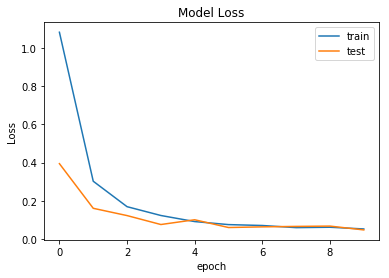

In [27]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper right")
plt.show()